In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from termcolor import colored
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from sklearn import set_config
from sklearn.manifold import TSNE
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import KMeans, MiniBatchKMeans, MeanShift, estimate_bandwidth, AffinityPropagation, Birch, DBSCAN, OPTICS, AgglomerativeClustering

import scipy.cluster.hierarchy as sch

from yellowbrick.cluster import KElbowVisualizer

In [30]:
!pip install scipy

In [2]:
from itertools import product
try:
    from kneed import KneeLocator
except:
    !pip install kneed
    from kneed import KneeLocator

In [3]:
# In case we had any unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import customer dataset
df = pd.DataFrame(pd.read_csv("Customer_Data.csv"))
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [6]:
df.drop(["CUST_ID"], axis=1, inplace=True)

In [7]:
# Defining the imputer,
imputer = KNNImputer()

# Fit it to the df,
imputer.fit(df)

# Transforming the df,
df1 = pd.DataFrame(imputer.transform(df), columns=df.columns)

# Printing the results
print(colored(f'Missing Values (before the imputer): {df.isna().sum().sum()}', 'red'))
print(colored(f'Missing Values (after the imputer): {df1.isna().sum().sum()}', 'green'))

Missing Values (before the imputer): 314
Missing Values (after the imputer): 0


In [8]:
scaler = StandardScaler().fit(df1)

df_trans = scaler.transform(df1)

df2 = pd.DataFrame(df_trans, columns = df1.columns)
df2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960336,-0.528979,-0.303812,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688696,0.818642,0.093556,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826116,-0.383805,-0.096029,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826116,-0.598688,-0.201440,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905368,-0.364368,-0.258964,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960336,-0.486217,-0.342416,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960336,-0.503396,-0.296762,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960336,-0.570615,-0.328132,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097755,-0.580536,-0.339490,0.329200,-4.122768


In [9]:
def dendoOptimizer(data):
    sch.dendrogram(sch.linkage(data, method='ward'))
    plt.title('Dendrogram')
    plt.xlabel('Customers')
    plt.ylabel('Euclidean distances')
    plt.show()

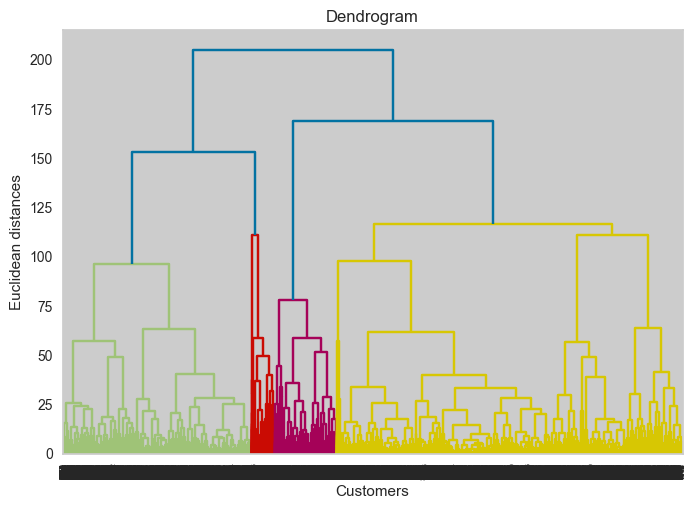

In [10]:
dendoOptimizer(df2)

In [11]:
silhouette_coef = []

for k in range(2,15):
    agg = AgglomerativeClustering(n_clusters=k)
    agg.fit(df2)
    score = silhouette_score(df2, agg.fit_predict(df2))
    silhouette_coef.append(score)

In [21]:
def optimal_components(silhouette_coef):
    """
        Input: silhouette_coef 
        Output: Optimal Number of Clusters
    """
    coeffs = np.array(silhouette_coef)
    return np.argmax(coeffs)+2

In [23]:
silhouette_coef

[0.18522926428070532,
 0.19237996435320331,
 0.17303721071588818,
 0.16217672426015772,
 0.17922971339014526,
 0.18198741683687247,
 0.184201445091409,
 0.18579303472434,
 0.18774984908451878,
 0.1941811433708348,
 0.17412792262780177,
 0.10932828963404295,
 0.11049820366514954]

In [22]:
optimal_components(silhouette_coef)

11

### Question 9 - Find the optimal number of components for Agglomerative Clustering

In [33]:
def grader_9(opt_comps):
    assert opt_comps == 11
    return "Validated Question 9"

In [34]:
grader_9(11)

'Validated Question 9'

In [12]:
def plot_evaluation(sh_score, name, x=range(2,11)):
    fig, ax = plt.subplots(1,1,figsize=(15,7), dpi=200)
    ax.plot(x, sh_score, marker='o', ms=9)
    ax.set_xlabel("Number of Clusters", labelpad=20)
    ax.set_ylabel("Silhouette Coefficient", labelpad=20)
    plt.suptitle(f'Evaluate {name} Clustering',y=0.9)
    plt.tight_layout(pad=3)
    plt.show()

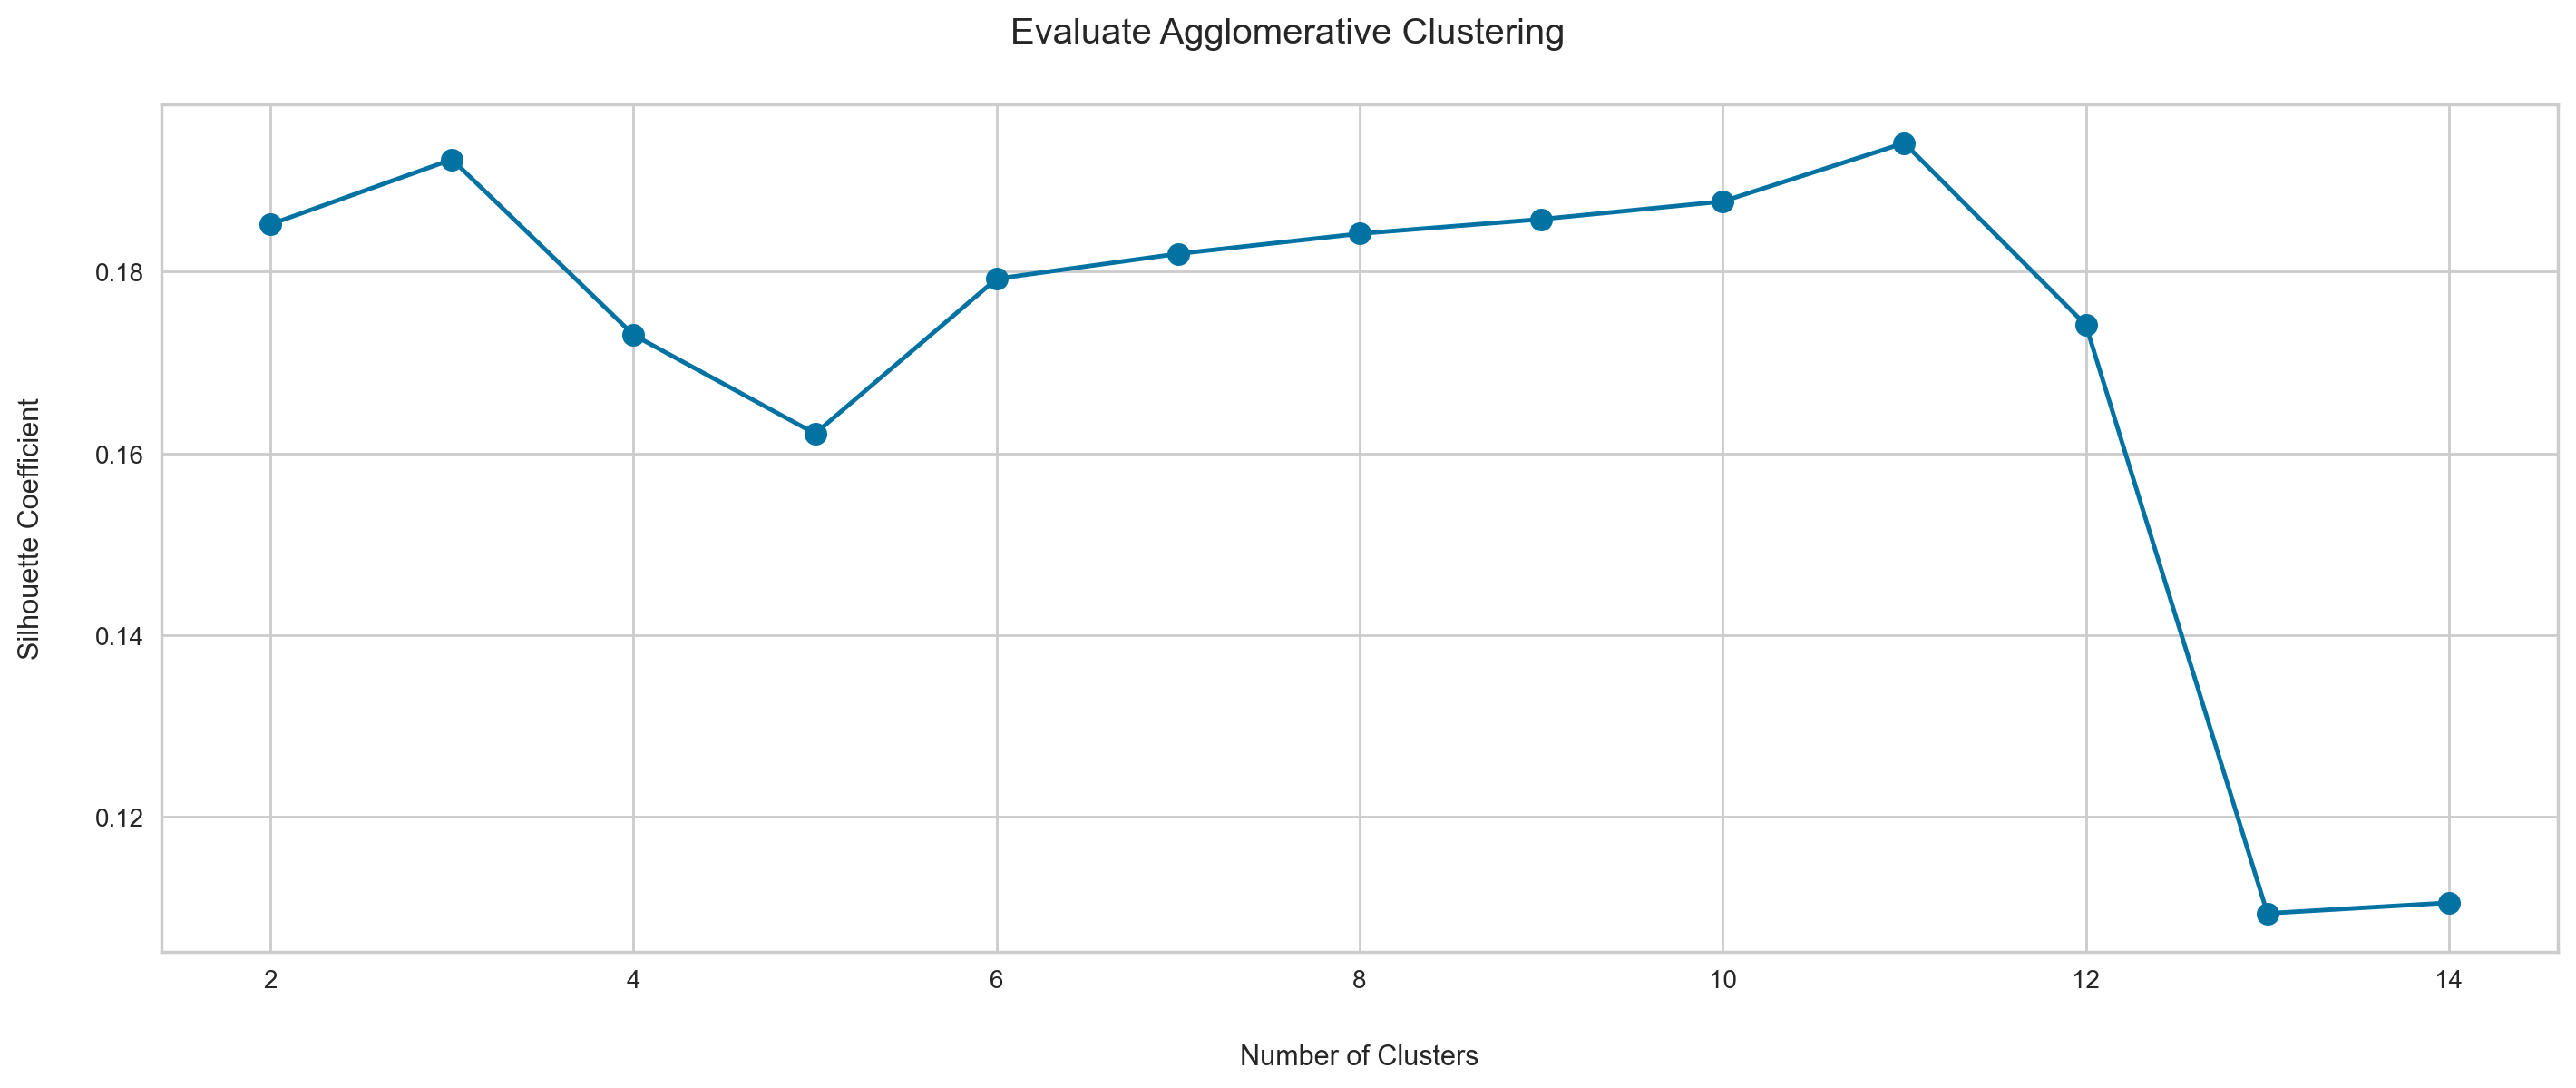

In [14]:
plot_evaluation(silhouette_coef, 'Agglomerative', x=range(2,15))

In [24]:
agg = AgglomerativeClustering(n_clusters=11)
agg.fit(df2)

AgglomerativeClustering(n_clusters=11)

In [25]:
pred = agg.labels_

In [26]:
sh_score = silhouette_score(df2, pred)

In [27]:
df_result_agg = pd.concat([df1, pd.DataFrame(pred, columns=['cluster'])], axis = 1)


In [28]:
def check_result(data):
    fig, axes = plt.subplots(1,2,figsize=(10,4))
    # Count of the clusters (using countplot),
    sns.countplot(data=data, x='cluster', ax=axes[0], saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
    for container in axes[0].containers:
        axes[0].bar_label(container, label_type="center", padding=5, size=12, color="black", rotation=0,
                          bbox={"boxstyle":"round", "pad":0.4, "facecolor":"#e0b583", "edgecolor":"#1c1c1c", "linewidth":2, "alpha":1})
    # Plotting the Pie plot,
    slices = data['cluster'].value_counts().sort_index().values
    activities = [var for var in data['cluster'].value_counts().sort_index().index]
    wedges, texts, autotexts = axes[1].pie(slices, labels=activities, shadow=True, autopct='%1.1f%%', textprops=dict(size=16, color="black"), pctdistance = 0.6, radius=1, wedgeprops=dict(edgecolor = "black", linewidth = 2),)
    plt.legend(wedges, data.cluster.value_counts().sort_index().index, title="Clusters", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
    plt.suptitle(f'Count of Each Cluster', y=1.09)
    plt.show()

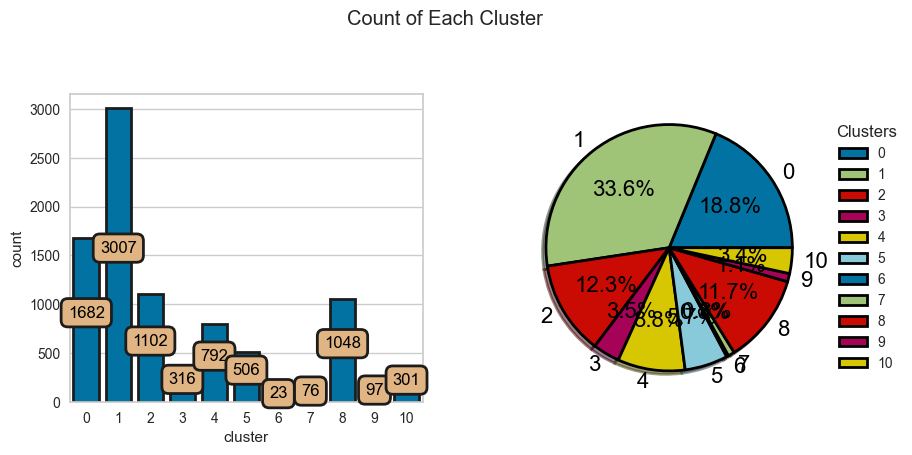

In [29]:
check_result(df_result_agg)

### Question 10 - Perform Agglomerative Clustering on the dataset with a chosen linkage method (e.g., complete linkage). After clustering, how many clusters do you obtain if you cut the dendrogram at a height of 50? Provide the exact number of clusters.

In [35]:
def num_of_clusters(df2):
    """
        Input: Pandas Dataframe
        Output: The number of clusters after dendogram cut
    """
    Z = linkage(df2, method='complete')

    # Plot the Dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(Z)
    plt.axhline(y=50, color='r', linestyle='--')  # Cut the dendrogram at height 50
    plt.show()

    # Cut the dendrogram at height 50 to form clusters
    clusters = fcluster(Z, t=50, criterion='distance')
    
    # Get the number of unique clusters
    num_clusters = len(set(clusters))
    return num_clusters

In [36]:
def grader_10(num_clusters):
    assert num_clusters == 1
    return "Validated Question 10"

### Question 11 - Determine the optimal height to cut the dendrogram by finding the largest vertical distance between two consecutive merges. At what height does this occur, and how many clusters are formed at this height?

In [39]:
def calculate_optimal_height(df2):
    """
        Input: Pandas Dataframe
        Output: Optimal Height and the number of clusters after dendogram cut
    """
    Z = linkage(df2, method='complete')
    
    # Extract the heights of the merges (these are the distances at which clusters are merged)
    heights = Z[:, 2]
    
    # Compute the differences between consecutive heights
    diffs = np.diff(heights)
    
    # Find the maximum difference
    max_diff_index = np.argmax(diffs)
    optimal_height = heights[max_diff_index + 1]
    
    # Cut the dendrogram at the optimal height to form clusters
    clusters = fcluster(Z, t=optimal_height, criterion='distance')
    
    # Get the number of unique clusters
    num_clusters = len(set(clusters))
    return optimal_height, num_clusters

In [40]:
optimal_height, num_clusters = calculate_optimal_height(df2)

In [41]:
optimal_height

33.7186632590227

In [42]:
num_clusters

4

In [44]:
def grader_11(optimal_height, num_clusters):
    assert num_clusters == 4
    assert round(optimal_height,1) == 33.7
    return "Validated Question 11"

In [45]:
grader_11(optimal_height, num_clusters)

'Validated Question 11'